In [1]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [3]:
import pandas as pd
house_df = pd.read_csv('/content/drive/MyDrive/CL/Day_1/kc_house_data.csv')
house_df.sample(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
9203,4086300065,20140718T000000,670000.0,3,1.75,1280,2147,1.5,0,0,...,7,1280,0,1910,0,98102,47.6362,-122.324,2010,2640
8958,5207200360,20140903T000000,420000.0,2,1.00,930,5368,1.0,0,0,...,7,930,0,1953,0,98115,47.6952,-122.275,1770,6000
731,2723089104,20140917T000000,315000.0,3,2.25,1540,17424,2.0,0,0,...,7,1540,0,1992,0,98045,47.4429,-121.759,1560,11439
6898,4327600010,20150202T000000,336000.0,3,3.00,1790,13350,1.0,0,0,...,7,1190,600,1988,0,98178,47.4958,-122.262,1740,10624
11488,2883200139,20150306T000000,1325000.0,4,3.50,2170,3672,2.0,0,0,...,9,2170,0,1905,1989,98115,47.6828,-122.329,1950,3450


In [9]:
from sklearn.model_selection import train_test_split
house_df.drop(['id','date'],inplace=True,axis=1)
X = house_df.drop(['price'],axis=1)
y = house_df['price']
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

KeyError: "['id', 'date'] not found in axis"

[Text(0.5716888957816377, 0.9444444444444444, 'x[8] <= 8.5\nsquared_error = 136325890491.895\nsamples = 15129\nvalue = 541276.857'),
 Text(0.30668424317617865, 0.8333333333333334, 'x[14] <= 47.534\nsquared_error = 37974305568.005\nsamples = 12140\nvalue = 437927.318'),
 Text(0.15679280397022333, 0.7222222222222222, 'x[2] <= 1943.0\nsquared_error = 13138569992.381\nsamples = 5104\nvalue = 315831.04'),
 Text(0.0794044665012407, 0.6111111111111112, 'x[2] <= 1405.0\nsquared_error = 7007258003.204\nsamples = 3212\nvalue = 270661.88'),
 Text(0.03970223325062035, 0.5, 'x[15] <= -122.378\nsquared_error = 5771910097.608\nsamples = 1518\nvalue = 239650.574'),
 Text(0.019851116625310174, 0.3888888888888889, 'x[6] <= 1.5\nsquared_error = 11610290612.972\nsamples = 70\nvalue = 369483.643'),
 Text(0.009925558312655087, 0.2777777777777778, 'x[14] <= 47.447\nsquared_error = 7675266987.233\nsamples = 59\nvalue = 343875.508'),
 Text(0.004962779156327543, 0.16666666666666666, 'x[11] <= 1995.0\nsquared_er

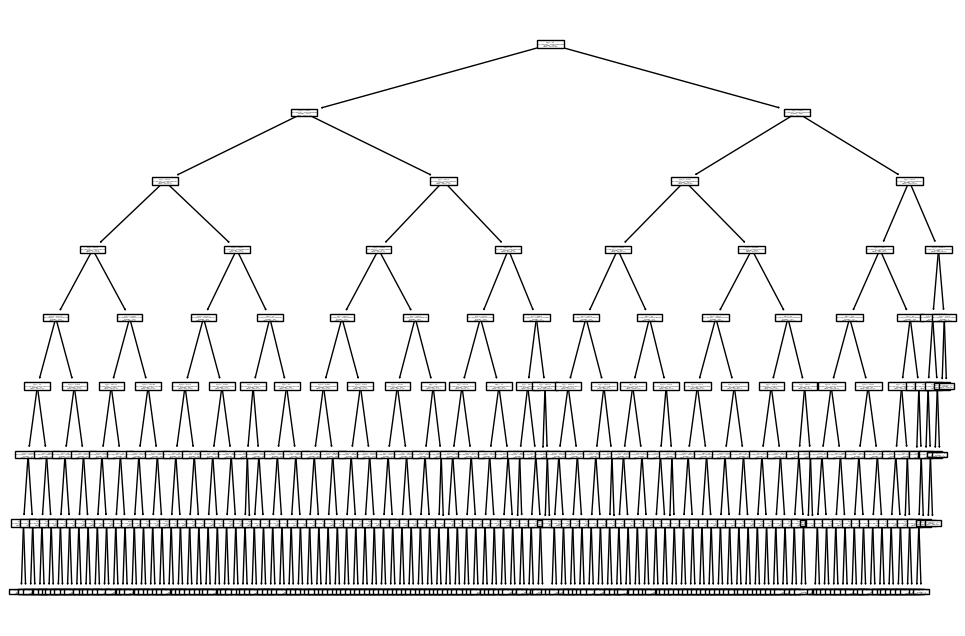

In [13]:
from sklearn.tree import DecisionTreeRegressor,plot_tree
import matplotlib.pyplot as plt

dtr = DecisionTreeRegressor(max_depth=8)
dtr.fit(x_train,y_train)
y_pred = dtr.predict(x_test)
plt.figure(figsize=(12,8))
plot_tree(dtr)



In [14]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import numpy as np
def print_metrics(y_true,y_pred):
  r2 = r2_score(y_true,y_pred)
  mea = mean_absolute_error(y_true,y_pred)
  mse = mean_squared_error(y_true,y_pred)
  print(f"r2 : {r2}")
  print(f"mea : {mea}")
  print(f"mse : {mse}")
  print(f"rmse : {np.sqrt(mse)}")

print_metrics(y_test,y_pred)

r2 : 0.8026940893879586
mea : 94400.00338886702
mse : 25876502995.748627
rmse : 160861.75118948764


In [15]:
# from sklearn.model_selection import GridSearchCV

# parameters = {
# }